In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import os

In [2]:
data = pd.read_excel('D:/Bukan Kuliah/Semester 4/Pengenalan Pola/UAS/mall1.xlsx')
os.environ['OMP_NUM_THREADS'] = '1'

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score
0,1,Male,19,20.5,2.3
1,2,Male,21,20.1,2.7
2,3,Female,20,21.2,1.5
3,4,Female,23,23.4,4.9
4,5,Female,31,22.7,3.2
5,6,Female,22,24.6,2.1
6,7,Female,35,25.0,4.5
7,8,Female,23,24.3,3.8
8,9,Male,64,23.8,1.8
9,10,Female,30,22.2,1.1


Text(0.5, 1.0, 'Melihat titik data income dan spending score')

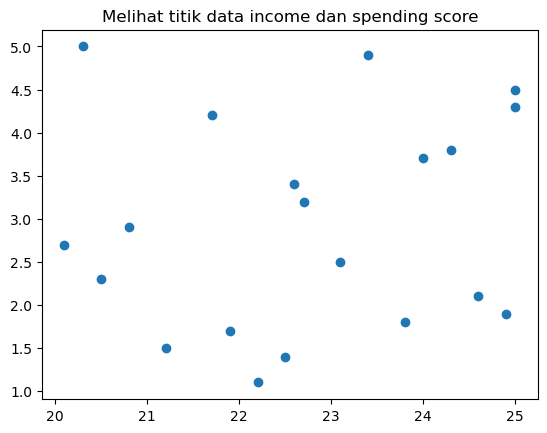

In [4]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score'])
plt.title('Melihat titik data income dan spending score')

In [5]:
X = data.iloc[:, [3,4]].values

In [6]:
sse = []
for i in range(1,11):
    km = KMeans(n_clusters= i, init='k-means++', n_init=10, random_state=0)
    km.fit(X)
    sse.append(km.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

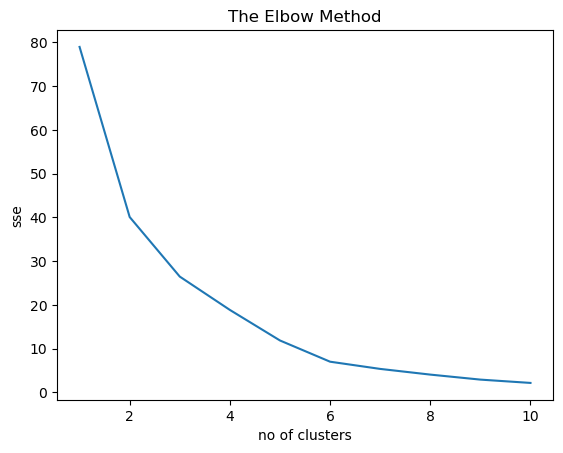

In [7]:
plt.plot(range(1,11), sse)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('sse')
plt.show()

In [8]:
hasil = KMeans(n_clusters=6, n_init=10)
prediksi_y = hasil.fit_predict(X)
data['cluster'] = prediksi_y
data

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score,cluster
0,1,Male,19,20.5,2.3,1
1,2,Male,21,20.1,2.7,1
2,3,Female,20,21.2,1.5,3
3,4,Female,23,23.4,4.9,0
4,5,Female,31,22.7,3.2,5
5,6,Female,22,24.6,2.1,2
6,7,Female,35,25.0,4.5,0
7,8,Female,23,24.3,3.8,0
8,9,Male,64,23.8,1.8,2
9,10,Female,30,22.2,1.1,3


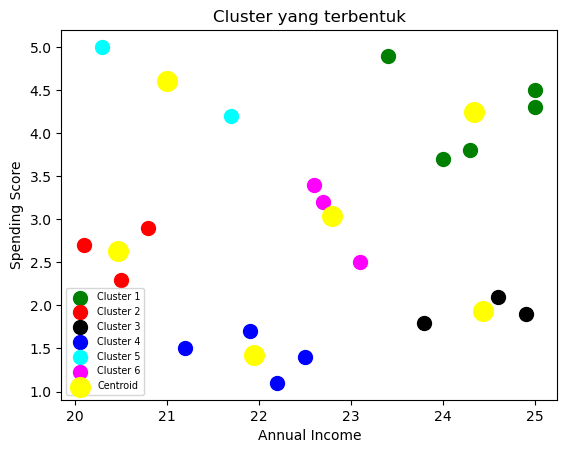

In [9]:
plt.scatter(X[prediksi_y == 0, 0], X[prediksi_y == 0, 1], s = 100, color='green', label = 'Cluster 1')
plt.scatter(X[prediksi_y == 1, 0], X[prediksi_y == 1, 1], s = 100, color='red', label = 'Cluster 2')
plt.scatter(X[prediksi_y == 2, 0], X[prediksi_y == 2, 1], s = 100, color='black', label = 'Cluster 3')
plt.scatter(X[prediksi_y == 3, 0], X[prediksi_y == 3, 1], s = 100, color='blue', label = 'Cluster 4')
plt.scatter(X[prediksi_y == 4, 0], X[prediksi_y == 4, 1], s = 100, color='cyan', label = 'Cluster 5')
plt.scatter(X[prediksi_y == 5, 0], X[prediksi_y == 5, 1], s = 100, color='magenta', label = 'Cluster 6')

plt.scatter(hasil.cluster_centers_[:, 0], hasil.cluster_centers_[:, 1], s=200, c='yellow', label='Centroid')

plt.title('Cluster yang terbentuk')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(loc='lower left', fontsize='x-small')